In [6]:
import pandas as pd
df_blitz = pd.read_csv("blitz_leaderboard_dates.csv")
df_bullet = pd.read_csv("bullet_leaderboard_dates.csv")
df_rapid = pd.read_csv("rapid_leaderboard_dates.csv")
df_daily960 = pd.read_csv("960daily_leaderboard_dates.csv")
df_live960 = pd.read_csv("960live_leaderboard_dates.csv")
df_daily = pd.read_csv("daily_leaderboard_dates.csv")

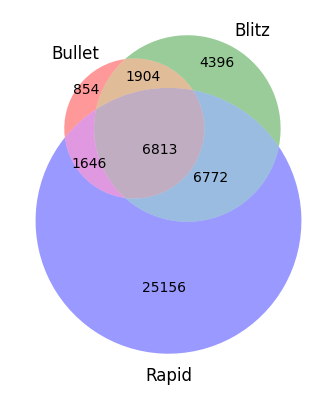

In [2]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

bullet_players = df_bullet['Player name'].tolist()
blitz_players = df_blitz['Player name'].tolist()
rapid_players = df_rapid['Player name'].tolist()
live960_players = df_live960['Player name'].tolist()
daily960_players = df_daily960['Player name'].tolist()
daily_players = df_daily['Player name'].tolist()

# Create the Venn diagram
venn3([set(bullet_players), set(blitz_players), set(rapid_players)], ('Bullet', 'Blitz', 'Rapid'))

# Show the plot
plt.show()

In [3]:
bullet_players = df_bullet['Player name']
blitz_players = df_blitz['Player name']
rapid_players = df_rapid['Player name']
live960_players = df_live960['Player name']
daily960_players = df_daily960['Player name']
daily_players = df_daily['Player name']

unique_bullet_players = bullet_players[~bullet_players.isin(blitz_players) & ~bullet_players.isin(rapid_players) & ~bullet_players.isin(live960_players) & ~bullet_players.isin(daily960_players) & ~bullet_players.isin(daily_players)]
unique_bullet_players

3         SewerpersonFan
4           incompatibIe
15         no_check_in_1
16       Rochan_to_Danke
22                vaxei1
              ...       
11195           ladoo165
11198       bizenbeijing
11199            NotNxbo
11205        Naufal_CE19
11211       twistedbeast
Name: Player name, Length: 787, dtype: object

In [4]:
combined_players = pd.concat([blitz_players, bullet_players, rapid_players])
unique_players = combined_players.drop_duplicates().tolist()
unique_player_count = len(unique_players)
unique_player_count

47541

In [5]:
combined_players = pd.concat([blitz_players, bullet_players, rapid_players, live960_players, daily960_players, daily_players])
unique_players = combined_players.drop_duplicates().tolist()
unique_player_count = len(unique_players)
unique_player_count

48620

In [6]:
# Assuming you have the df_blitz DataFrame already loaded
df_blitz['Last Online chess.com server time'] = pd.to_datetime(df_blitz['Last Online chess.com server time'])
df_bullet['Last Online chess.com server time'] = pd.to_datetime(df_bullet['Last Online chess.com server time'])
df_rapid['Last Online chess.com server time'] = pd.to_datetime(df_rapid['Last Online chess.com server time'])
df_daily960['Last Online chess.com server time'] = pd.to_datetime(df_daily960['Last Online chess.com server time'])
df_live960['Last Online chess.com server time'] = pd.to_datetime(df_live960['Last Online chess.com server time'])
df_daily['Last Online chess.com server time'] = pd.to_datetime(df_daily['Last Online chess.com server time'])

# Define the date to filter the data
filter_date = pd.Timestamp('2022-12-31 00:00:00')

# Filter the DataFrame to keep rows with a date greater than or equal to the filter_date
df_filtered_blitz = df_blitz[df_blitz['Last Online chess.com server time'] >= filter_date]
df_filtered_bullet = df_bullet[df_bullet['Last Online chess.com server time'] >= filter_date]
df_filtered_rapid = df_rapid[df_rapid['Last Online chess.com server time'] >= filter_date]
df_filtered_daily960 = df_daily960[df_daily960['Last Online chess.com server time'] >= filter_date]
df_filtered_live960 = df_live960[df_live960['Last Online chess.com server time'] >= filter_date]
df_filtered_daily = df_daily[df_daily['Last Online chess.com server time'] >= filter_date]

# Display the filtered DataFrame
#print(df_filtered_rapid)


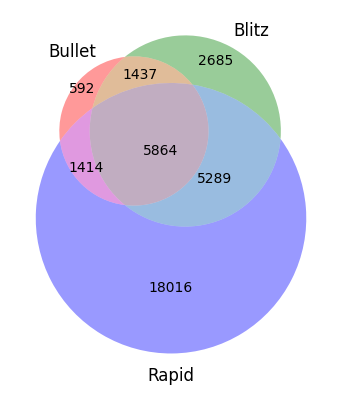

In [7]:
bullet_players = df_filtered_bullet['Player name'].tolist()
blitz_players = df_filtered_blitz['Player name'].tolist()
rapid_players = df_filtered_rapid['Player name'].tolist()
live960_players = df_filtered_live960['Player name'].tolist()
daily960_players = df_filtered_daily960['Player name'].tolist()
daily_players = df_filtered_daily['Player name'].tolist()

# Create the Venn diagram
venn3([set(bullet_players), set(blitz_players), set(rapid_players)], ('Bullet', 'Blitz', 'Rapid'))

# Show the plot
plt.show()

In [8]:
bullet_players = df_filtered_bullet['Player name']
blitz_players = df_filtered_blitz['Player name']
rapid_players = df_filtered_rapid['Player name']
live960_players = df_filtered_live960['Player name']
daily960_players = df_filtered_daily960['Player name']
daily_players = df_filtered_daily['Player name']

unique_bullet_players = bullet_players[~bullet_players.isin(blitz_players) & ~bullet_players.isin(rapid_players) & ~bullet_players.isin(live960_players) & ~bullet_players.isin(daily960_players) & ~bullet_players.isin(daily_players)]
unique_bullet_players

3         SewerpersonFan
4           incompatibIe
15         no_check_in_1
16       Rochan_to_Danke
22                vaxei1
              ...       
11195           ladoo165
11198       bizenbeijing
11199            NotNxbo
11205        Naufal_CE19
11211       twistedbeast
Name: Player name, Length: 534, dtype: object

In [9]:
unique_daily_players = daily_players[~daily_players.isin(blitz_players) & ~daily_players.isin(rapid_players) & ~daily_players.isin(live960_players) & ~daily_players.isin(daily960_players) & ~daily_players.isin(bullet_players)]
unique_daily_players

2            yokes3105
9       kouki_beginner
11         sooofiaaa23
13            LarukuSU
25              AAGHHH
             ...      
4841      Erich_Tarski
4849    dreamerdreamer
4860         Annie1099
4870     MONSTA_X_KPOP
4876          jbdreher
Name: Player name, Length: 828, dtype: object

In [10]:
combined_players = pd.concat([blitz_players, bullet_players, rapid_players])
unique_players = combined_players.drop_duplicates().tolist()
unique_player_count = len(unique_players)
unique_player_count

35297

In [15]:
df_all = pd.read_csv("unique_player_dates.csv")
df_all

,Player name,Joined,Last Online chess.com server time
0,Angry_Twin,"Aug 4, 2012",2023-03-31 18:47:30
1,Ryuzaki_Mochizuki,"Oct 27, 2020",2023-01-16 00:00:00
2,csgt_voz,"Oct 26, 2022",2023-03-23 18:47:43
3,Black-Flash,"Jul 31, 2021",2023-03-31 18:47:50
4,Gats1,"Oct 12, 2020",2023-03-28 18:47:57
...,...,...,...
48615,hazuki23,"Mar 14, 2015",2023-04-02 20:41:52
48616,dragonhidemomo1,"Dec 17, 2019",2023-01-18 00:00:00
48617,ChristopherKavanaugh,"Jun 17, 2018",2023-04-03 19:43:42
48618,YasuoG,"Nov 2, 2012",2022-12-13 00:00:00


In [14]:
df_all['Last Online chess.com server time'] = pd.to_datetime(df_all['Last Online chess.com server time'])
filter_date = pd.Timestamp('2022-12-31 00:00:00')
df_filtered_all = df_all[df_all['Last Online chess.com server time'] >= filter_date]
df_filtered_all

,Player name,Joined,Last Online chess.com server time
0,Angry_Twin,"Aug 4, 2012",2023-03-31 18:47:30
1,Ryuzaki_Mochizuki,"Oct 27, 2020",2023-01-16 00:00:00
2,csgt_voz,"Oct 26, 2022",2023-03-23 18:47:43
3,Black-Flash,"Jul 31, 2021",2023-03-31 18:47:50
4,Gats1,"Oct 12, 2020",2023-03-28 18:47:57
...,...,...,...
48614,BedwettingComet,"Jun 20, 2017",2023-03-25 20:40:34
48615,hazuki23,"Mar 14, 2015",2023-04-02 20:41:52
48616,dragonhidemomo1,"Dec 17, 2019",2023-01-18 00:00:00
48617,ChristopherKavanaugh,"Jun 17, 2018",2023-04-03 19:43:42


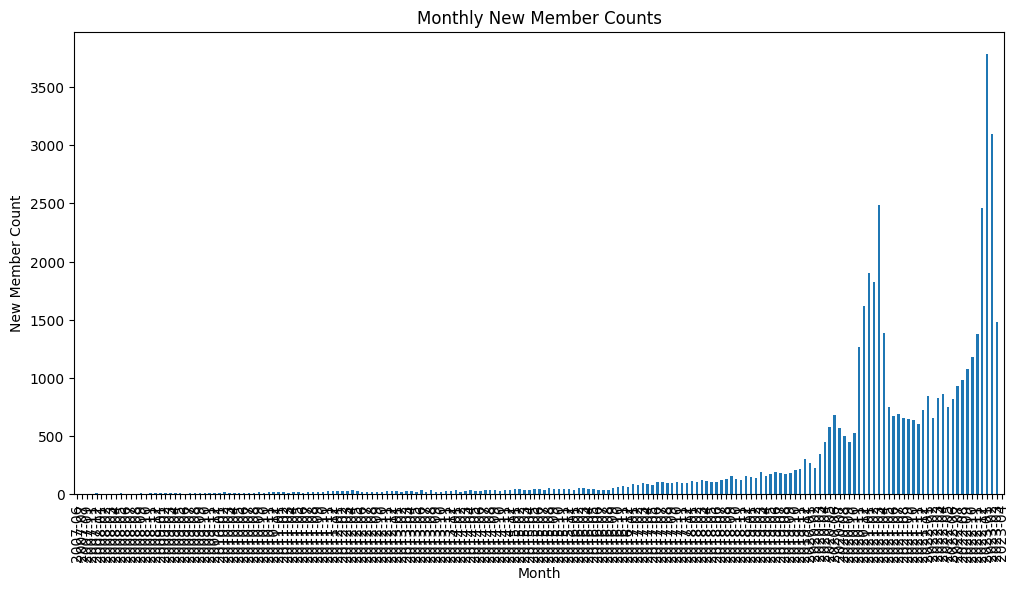

In [18]:
df_all['Join date'] = pd.to_datetime(df_all['Joined'])
df_all['Join month'] = df_all['Join date'].dt.strftime('%Y-%m')
monthly_counts = df_all['Join month'].value_counts().sort_index()

# Create a bar chart of monthly counts
monthly_counts.plot(kind='bar', figsize=(12,6))
plt.title('Monthly New Member Counts')
plt.xlabel('Month')
plt.ylabel('New Member Count')
plt.show()

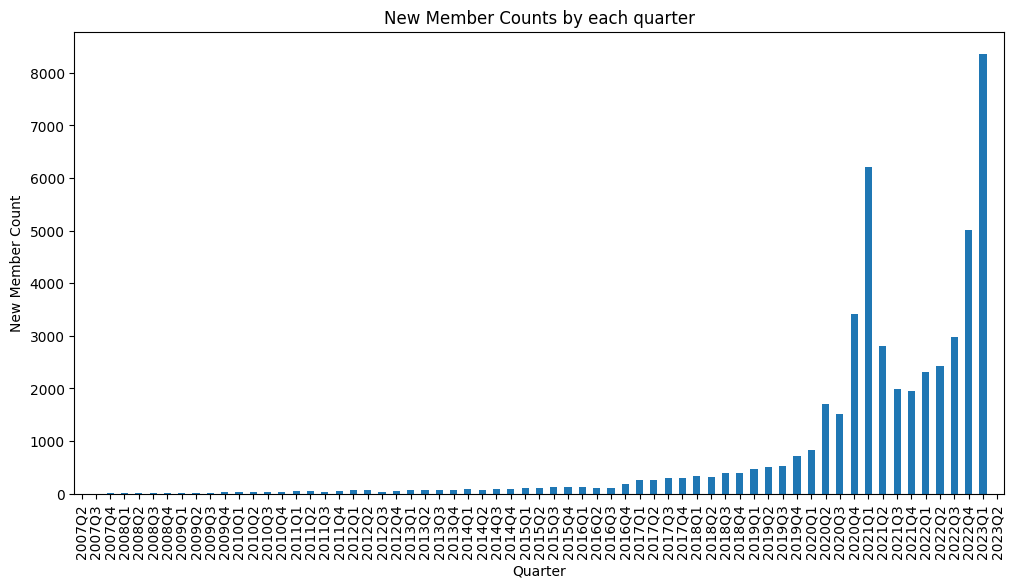

In [17]:
df_all['Join date'] = pd.to_datetime(df_all['Joined'])
df_all['Join quarter'] = df_all['Join date'].dt.to_period('Q')

quarterly_counts = df_all['Join quarter'].value_counts().sort_index()

quarterly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('New Member Counts by each quarter')
plt.xlabel('Quarter')
plt.ylabel('New Member Count')
plt.show()